# ANN Model creation and testing

## Contents

1. Training data generation
2. ANN model training and testing
3. Implementation of the model in GWSNR

In [1]:
# # If you have not installed the following packages, please uncomment and run the following command:
# !pip install ler

## 1. Training data generation

* The training data is generated using [ler](https://ler.readthedocs.io/en/latest/) package.
* Data needs to be trained for each detector separately.
* I will choose 'H1' detector for this notebook with the following specified parameters:
    * Sampling frequency : 2048 Hz
    * waveform approximant : IMRPhenomXPHM
    * minimum frequency : 20.0
    * psd : aLIGO_O4_high_asd.txt from `pycbc` package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import TrainingDataGenerator

In [2]:
tdg = TrainingDataGenerator(
    npool=8,  # number of processes
    verbose=False, # set it to True if you are running the code for the first time
    # GWSNR parameters
    sampling_frequency=2048.,
    waveform_approximant='IMRPhenomXPHM',  # spin-precessing waveform model
    minimum_frequency=20.,
    psds={'H1':'aLIGO_O4_high_asd.txt'}, # chosen interferometer is 'H1'. If multiple interferometers are chosen, optimal network SNR will be considered.
    spin_zero=False,
    spin_precessing=True,
    snr_type='inner_product',  # 'interpolation' or 'inner_product'
)

* `ler` package, by default, generates astrophysical signals that most likely will not be detected by the detector, i.e. low SNR signals.

* But you want your ANN model to be sensitive to the signals that near the detection threshold.

* So, I will generate most of the training data with SNR near the detection threshold.

**Note:** Increase sample size of the training data to get better accuracy in the ANN model.

In [3]:
# rerun if hanged
ler = tdg.gw_parameters_generator(
    size=10000,  # number of samples to generate
    batch_size=400000,  # reduce this number if you have memory issues
    snr_recalculation=True,  # pick SNR generated with 'interpolation'; recalculate SNR using 'inner product'
    trim_to_size=False, verbose=True,
    data_distribution_range = [0., 2., 4., 6., 8., 10., 12., 14., 16., 100.],  # equal data samples will be distributed in these ranges
    replace=False,  # set to True if you want to replace the existing data
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_H1_1.json",
)


Initializing GWRATES class...

total event to collect: 10000



100%|████████████████████████████████████████████████████████████| 395/395 [00:01<00:00, 391.11it/s]


Collected number of events: 351


100%|████████████████████████████████████████████████████████████| 412/412 [00:01<00:00, 384.30it/s]


Collected number of events: 702


100%|████████████████████████████████████████████████████████████| 466/466 [00:01<00:00, 406.49it/s]


Collected number of events: 1080


100%|████████████████████████████████████████████████████████████| 530/530 [00:01<00:00, 406.02it/s]


Collected number of events: 1548


100%|████████████████████████████████████████████████████████████| 341/341 [00:00<00:00, 355.22it/s]


Collected number of events: 1836


100%|████████████████████████████████████████████████████████████| 377/377 [00:01<00:00, 370.71it/s]


Collected number of events: 2160


100%|████████████████████████████████████████████████████████████| 341/341 [00:00<00:00, 399.63it/s]


Collected number of events: 2457


100%|████████████████████████████████████████████████████████████| 351/351 [00:00<00:00, 377.56it/s]


Collected number of events: 2700


100%|████████████████████████████████████████████████████████████| 332/332 [00:00<00:00, 372.97it/s]


Collected number of events: 2934


100%|████████████████████████████████████████████████████████████| 494/494 [00:01<00:00, 406.50it/s]


Collected number of events: 3366


100%|████████████████████████████████████████████████████████████| 475/475 [00:01<00:00, 397.88it/s]


Collected number of events: 3717


100%|████████████████████████████████████████████████████████████| 394/394 [00:00<00:00, 406.61it/s]


Collected number of events: 4041


100%|████████████████████████████████████████████████████████████| 375/375 [00:00<00:00, 389.93it/s]


Collected number of events: 4383


100%|████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 431.18it/s]


Collected number of events: 4779


100%|████████████████████████████████████████████████████████████| 360/360 [00:00<00:00, 382.35it/s]


Collected number of events: 5076


100%|████████████████████████████████████████████████████████████| 395/395 [00:01<00:00, 384.34it/s]


Collected number of events: 5427


100%|████████████████████████████████████████████████████████████| 351/351 [00:00<00:00, 357.97it/s]


Collected number of events: 5724


100%|████████████████████████████████████████████████████████████| 312/312 [00:00<00:00, 370.16it/s]


Collected number of events: 5940


100%|████████████████████████████████████████████████████████████| 378/378 [00:00<00:00, 386.80it/s]


Collected number of events: 6219


100%|████████████████████████████████████████████████████████████| 375/375 [00:01<00:00, 368.15it/s]


Collected number of events: 6516


100%|████████████████████████████████████████████████████████████| 557/557 [00:01<00:00, 443.68it/s]


Collected number of events: 6930


100%|████████████████████████████████████████████████████████████| 414/414 [00:01<00:00, 399.43it/s]


Collected number of events: 7290


100%|████████████████████████████████████████████████████████████| 387/387 [00:00<00:00, 389.18it/s]


Collected number of events: 7578


100%|████████████████████████████████████████████████████████████| 378/378 [00:00<00:00, 400.78it/s]


Collected number of events: 7884


100%|████████████████████████████████████████████████████████████| 332/332 [00:01<00:00, 300.06it/s]


Collected number of events: 8172


100%|████████████████████████████████████████████████████████████| 348/348 [00:00<00:00, 371.15it/s]


Collected number of events: 8460


100%|████████████████████████████████████████████████████████████| 360/360 [00:00<00:00, 388.12it/s]


Collected number of events: 8748


100%|████████████████████████████████████████████████████████████| 351/351 [00:00<00:00, 388.52it/s]


Collected number of events: 9036


100%|████████████████████████████████████████████████████████████| 278/278 [00:00<00:00, 344.11it/s]


Collected number of events: 9198


100%|████████████████████████████████████████████████████████████| 457/457 [00:01<00:00, 403.50it/s]


Collected number of events: 9576


100%|████████████████████████████████████████████████████████████| 349/349 [00:00<00:00, 376.53it/s]


Collected number of events: 9900


100%|████████████████████████████████████████████████████████████| 404/404 [00:01<00:00, 401.31it/s]


Collected number of events: 10215
final size: 10215

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_H1_1.json



In [4]:
# might take 2mins~3mins
# 10 mins 0.7 s, 10000 samples with 8 processes and batch_size=200000  
tdg.gw_parameters_generator(
    size=5000, 
    batch_size=200000, 
    snr_recalculation=True,
    trim_to_size=False, verbose=True, 
    data_distribution_range = [4., 8., 12.], # equal data samples will be distributed in these ranges
    replace=False,
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_H1_2.json",
)


Initializing GWRATES class...

total event to collect: 5000



100%|████████████████████████████████████████████████████████████| 460/460 [00:01<00:00, 410.90it/s]


Collected number of events: 406


100%|████████████████████████████████████████████████████████████| 518/518 [00:01<00:00, 438.37it/s]


Collected number of events: 860


100%|████████████████████████████████████████████████████████████| 456/456 [00:01<00:00, 419.49it/s]


Collected number of events: 1250


100%|████████████████████████████████████████████████████████████| 474/474 [00:01<00:00, 397.48it/s]


Collected number of events: 1664


100%|████████████████████████████████████████████████████████████| 478/478 [00:01<00:00, 441.65it/s]


Collected number of events: 2086


100%|████████████████████████████████████████████████████████████| 508/508 [00:01<00:00, 445.10it/s]


Collected number of events: 2536


100%|████████████████████████████████████████████████████████████| 472/472 [00:01<00:00, 403.63it/s]


Collected number of events: 2960


100%|████████████████████████████████████████████████████████████| 474/474 [00:01<00:00, 421.65it/s]


Collected number of events: 3382


100%|████████████████████████████████████████████████████████████| 482/482 [00:01<00:00, 425.66it/s]


Collected number of events: 3792


100%|████████████████████████████████████████████████████████████| 476/476 [00:01<00:00, 436.38it/s]


Collected number of events: 4190


100%|████████████████████████████████████████████████████████████| 502/502 [00:01<00:00, 439.45it/s]


Collected number of events: 4638


100%|████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 440.24it/s]

Collected number of events: 5076
final size: 5076

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_H1_2.json



In [5]:
tdg.gw_parameters_generator(
    size=10000,
    batch_size=10000, 
    snr_recalculation=True,
    trim_to_size=False, 
    verbose=False, 
    data_distribution_range = None,
    replace=True,
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_H1_3.json",
)


Initializing GWRATES class...

total event to collect: 10000

final size: 10000

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_H1_3.json



### Additional random samples

In [6]:
from gwsnr import GWSNR
import numpy as np

gwsnr = GWSNR(
    npool=8,  # number of processes
    # GWSNR parameters
    sampling_frequency=2048.,
    waveform_approximant='IMRPhenomXPHM',  # spin-precessing waveform model
    minimum_frequency=20.,
    psds={'H1':'aLIGO_O4_high_asd.txt'}, # chosen interferometer is 'H1'. If multiple network SNR will be considered.
    snr_type='inner_product',  # 'interpolation' or 'inner_product'
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)

Chosen GWSNR initialization parameters:

npool:  8
snr type:  inner_product
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  9.96
max(mtot) (with the given fmin=20.0): 235.0
detectors:  ['H1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt')]




In [7]:
# gerneral case, random parameters
np.random.seed(64)
nsamples = 50000
mtot = np.random.uniform(2*4.98, 2*112.5,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
param_dict = dict(
    # convert to component masses
    mass_1 = mtot / (1 + mass_ratio),
    mass_2 = mtot * mass_ratio / (1 + mass_ratio),
    # Fix luminosity distance
    luminosity_distance = np.random.uniform(40, 10000, size=nsamples),  # Random luminosity distance between 40 and 10000 Mpc
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(-np.pi/2,np.pi/2, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434*np.ones(nsamples),
    # spin zero
    a_1 = np.random.uniform(0.0,0.8, size=nsamples),
    a_2 = np.random.uniform(0.0,0.8, size=nsamples),
    tilt_1 = np.random.uniform(0, np.pi, size=nsamples),  # tilt angle of the primary black hole in radians
    tilt_2 = np.random.uniform(0, np.pi, size=nsamples),
    phi_12 = np.random.uniform(0, 2*np.pi, size=nsamples),  # Relative angle between the primary and secondary spin of the binary in radians
    phi_jl = np.random.uniform(0, 2*np.pi, size=nsamples),  # Angle between the total angular momentum and the orbital angular momentum in radians
)

snrs_ = gwsnr.snr(gw_param_dict=param_dict)
# time: 0.2 s for 50000 samples with 8 processes

solving SNR with inner product


100%|███████████████████████████████████████████████████████| 50000/50000 [00:37<00:00, 1338.73it/s]


In [8]:
param_dict.update(snrs_)
from gwsnr.utils import append_json
append_json(
    file_name="ler_data/IMRPhenomXPHM_O4_high_asd_H1_4.json", 
    new_dictionary =param_dict,
    replace=True,  # set to True if you want to replace the existing data
);

### Combine all the data files into one

## H1 detector

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import TrainingDataGenerator

tdg = TrainingDataGenerator()
tdg.combine_dicts(
    file_name_list=["IMRPhenomXPHM_O4_high_asd_H1_1.json", "IMRPhenomXPHM_O4_high_asd_H1_2.json", "IMRPhenomXPHM_O4_high_asd_H1_3.json", "IMRPhenomXPHM_O4_high_asd_H1_4.json"],
    detector='H1',
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_H1.json",
)

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_H1.json



In [10]:
# from gwsnr.utils import get_param_from_json
# test1 = get_param_from_json("./ler_data/IMRPhenomXPHM_O4_high_asd_H1.json")

# snr = np.array(test1['H1'])
# print(f"Number of samples: {len(snr)}")

# plt.figure(figsize=[4,4])
# plt.hist(snr, bins=100, density=True, alpha=0.5, color='b', histtype='step', label='H1')
# plt.xlim([0, 40])
# plt.xlabel('Optimal SNR')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

### ANN model training and testing

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from gwsnr.ann import ANNModelGenerator

In [12]:
amg = ANNModelGenerator(
    directory='./ann_data',
    npool=8,
    gwsnr_verbose=False,
    snr_th=8.0,
    waveform_approximant="IMRPhenomXPHM",
    psds={'H1': 'aLIGO_O4_high_asd.txt'},  
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_1.pickle




In [13]:
amg.ann_model_training(
    gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_H1.json', # you can also get the dict from a json file first
    randomize=True,
    test_size=0.1,
    random_state=42,
    num_nodes_list = [5, 32, 32, 1],
    activation_fn_list = ['relu', 'relu', 'sigmoid', 'linear'],
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy'],
    batch_size=32,
    epochs=100,
    error_adjustment_snr_range=[2,14],
    ann_file_name = 'ann_model_H1.h5',
    scaler_file_name = 'scaler_H1.pkl',
    error_adjustment_file_name='error_adjustment_H1.json',
    ann_path_dict_file_name='ann_path_dict.json',
)

# # Uncomment the following, if you have already trained the model
# # load the trained model
# amg.load_model_scaler_error(
#     ann_file_name='ann_model_H1.h5', 
#     scaler_file_name='scaler_H1.pkl',
#     error_adjustment_file_name='error_adjustment_H1.json',
# )

Epoch 1/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 4.6322e-04 - loss: 1075.6736
Epoch 2/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - accuracy: 4.8894e-04 - loss: 1000.9934
Epoch 3/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 6.7348e-04 - loss: 1045.1288
Epoch 4/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 7.5949e-04 - loss: 712.6802
Epoch 5/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - accuracy: 9.9912e-04 - loss: 609.4849
Epoch 6/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 311us/step - accuracy: 0.0010 - loss: 699.9709  
Epoch 7/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.0011 - loss: 569.9766
Epoch 8/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step - accuracy: 0.0011 - loss: 635.4453
Epoch 9/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.0014 - loss: 454.8651
Epoch 10/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 1s 310us/step - accuracy: 0.0013 - loss: 462.4346
Epoch 11/100
2118/2118 ━━━━━━━━━━━━━━━━━━━━ 

In [14]:
amg.pdet_error()

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
Error: 2.19%


(2.1912350597609564,
 array([ 0.5685926, 10.908554 , 13.739377 , ..., 10.180197 ,
         2.0716174,  4.467376 ], dtype=float32),
 array([ 0.31062778, 11.61518456, 14.25082726, ..., 10.88331761,
         1.76849256,  5.05261605]))

In [15]:
amg.pdet_confusion_matrix()

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step
[[5133   97]
 [  67 2233]]
Accuracy: 97.822%


(array([[5133,   97],
        [  67, 2233]]),
 97.82204515272245,
 array([False,  True,  True, ...,  True, False, False]),
 array([False,  True,  True, ...,  True, False, False]))

2353/2353 ━━━━━━━━━━━━━━━━━━━━ 1s 210us/step


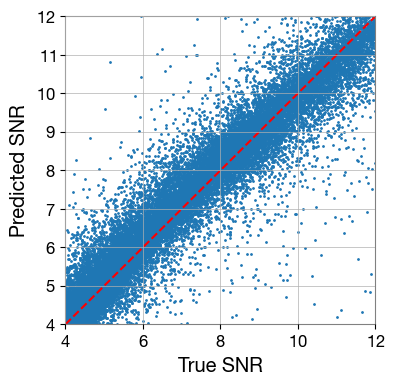

In [16]:
# predicted snr
pred_snr= amg.predict_snr(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_H1.json')
# true snr
true_snr = amg.get_parameters(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_H1.json')['H1']
# select only snr between 4 and 12
snr_min = 4
snr_max = 12
mask = (true_snr >= snr_min) & (true_snr <= snr_max)
true_snr = true_snr[mask]
pred_snr = pred_snr[mask]

# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
plt.xlim([snr_min, snr_max])
plt.ylim([snr_min, snr_max])
plt.show()

In [17]:
# use the following function to predict the pdet
pred_pdet = amg.predict_pdet(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_H1.json', snr_threshold=8.0)

true_snr = amg.get_parameters(gw_param_dict='ler_data/IMRPhenomXPHM_O4_high_asd_H1.json')['H1']
# true pdet
true_pdet = np.array([1 if snr >= 8.0 else 0 for snr in true_snr])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_pdet, pred_pdet)
print(cm)

acc = accuracy_score(true_pdet, pred_pdet)
print(acc)


2353/2353 ━━━━━━━━━━━━━━━━━━━━ 1s 213us/step
[[51957  1155]
 [  651 21528]]
0.9760130692911503


## 3. Implementation of the ANN model in GWSNR

Generate new astrophysical data and test the model on it using GWSNR class.

In [19]:
from ler.utils import TrainingDataGenerator

# generate some new data
tdg = TrainingDataGenerator(
    npool=4,
    verbose=False, 
    # GWSNR parameters
    sampling_frequency=2048,
    waveform_approximant='IMRPhenomXPHM',
    psds={'H1': 'aLIGO_O4_high_asd.txt'},  
    minimum_frequency=20,
    spin_zero=False,
    spin_precessing=True,
    snr_type='inner_product',
)

tdg.gw_parameters_generator(
    size=20000, 
    batch_size=20000, 
    snr_recalculation=False,
    trim_to_size=False, 
    verbose=True, 
    data_distribution_range = None, 
    replace=False,
    output_jsonfile="IMRPhenomXPHM_O4_high_asd_H1_5.json",
)


Initializing GWRATES class...

total event to collect: 20000



100%|████████████████████████████████████████████████████████| 19512/19512 [00:26<00:00, 730.12it/s]


Collected number of events: 20000
final size: 20000

json file saved at: ./ler_data/IMRPhenomXPHM_O4_high_asd_H1_5.json



* using GWSNR class, with the trained ANN model, you can generate SNR of the astrophysical GW signal parameters

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from gwsnr import GWSNR

gwsnr = GWSNR(
    snr_type='ann',
    npool=8,  # number of processes
    waveform_approximant="IMRPhenomXPHM",
    psds={'H1': 'aLIGO_O4_high_asd.txt'},
    ann_path_dict='./ann_data/ann_path_dict.json',
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
ANN model and scaler path is given. Using the given path.
ANN model for H1 is loaded from ./ann_data/ann_model_H1.h5.
ANN scaler for H1 is loaded from ./ann_data/scaler_H1.pkl.
ANN error_adjustment for H1 is loaded from ./ann_data/error_adjustment_H1.json.
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_1.pickle

Chosen GWSNR initialization parameters:

npool:  8
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  9.96
max(mtot) (with the given fmin=20.0): 235.0
detectors:  ['H1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_

In [21]:
# predicted snr, using ANN model 
pred_snr = gwsnr.snr_with_ann(gw_param_dict='./ler_data/IMRPhenomXPHM_O4_high_asd_H1_5.json')['H1']#['optimal_snr_net']

In [22]:
from gwsnr.utils import get_param_from_json
true_snr = get_param_from_json('./ler_data/IMRPhenomXPHM_O4_high_asd_H1_5.json')['H1']#['optimal_snr_net']

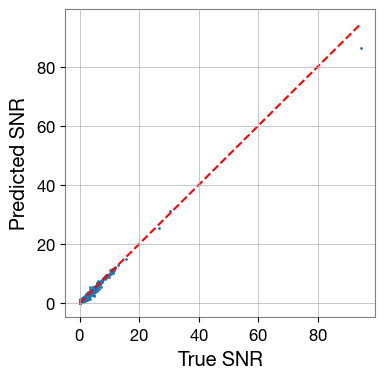

In [23]:
# select only snr between 4 and 12
# snr_min = 4
# snr_max = 12
# mask = (true_snr >= snr_min) & (true_snr <= snr_max)
# true_snr = true_snr[mask]
# pred_snr = pred_snr[mask]

# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
# plt.xlim([snr_min, snr_max])
# plt.ylim([snr_min, snr_max])
plt.show()

In [24]:
# use the following function to predict the pdet
pred_pdet = np.array([1 if snr >= 8.0 else 0 for snr in pred_snr])
# true pdet
true_pdet = np.array([1 if snr >= 8.0 else 0 for snr in true_snr])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_pdet, pred_pdet)
print(cm)

acc = accuracy_score(true_pdet, pred_pdet)
print(acc)

[[19965     2]
 [    0    33]]
0.9999
